<a href="https://colab.research.google.com/github/hwarang97/spam_classifier/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('/content/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
print(df.isna().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [7]:
df = df.drop('Unnamed: 0', axis=1)

([<matplotlib.patches.Wedge at 0x7e6887b2c370>,
 [Text(-0.041832502603297225, -1.0992042766137444, '0'),
  Text(0.04183239968836546, 1.0992042805303812, '1')],
 [Text(-0.022817728692707578, -0.5995659690620424, '71.0%'),
  Text(0.02281767255729025, 0.5995659711983897, '29.0%')])

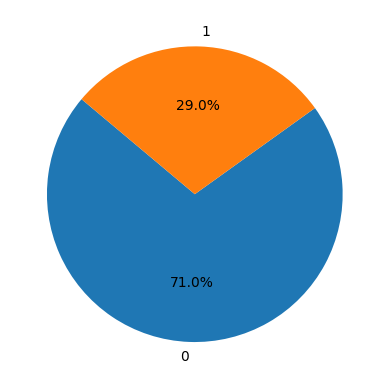

In [8]:
# #Destribution of Target Variable
# counts = df['label_num'].value_counts()
# plt.pie(counts, labels= counts.index, autopct='%1.1f%%', startangle=140)

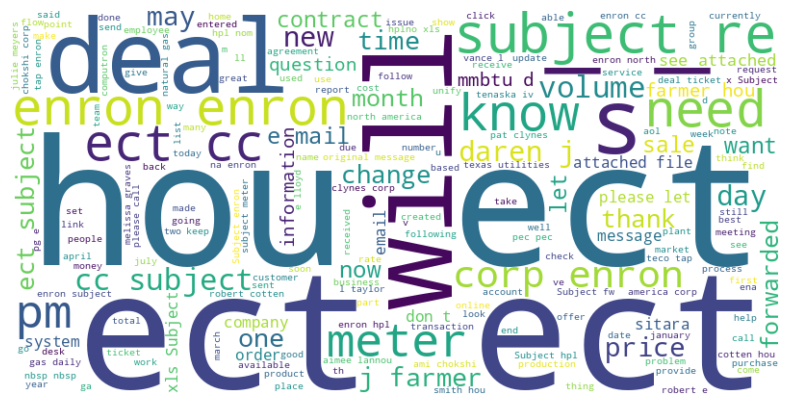

In [ ]:
# #World Cloud

# text_corpus = " ".join(df['text'])

# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# # Display the word cloud using matplotlib
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [10]:
X = df['text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#converting text data into a numerical format
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# # Train the Naive Bayes model
# naive_model = MultinomialNB()
# naive_model.fit(X_train_vec, y_train)

# # Predict using the trained model
# y_pred = naive_model.predict(X_test_vec)

In [16]:
# 빈도수가 높은 단어가 변별력이 있는지 확인해보자
voca = vectorizer.vocabulary_
print(type(voca))
print(dict(sorted(voca.items() , key=lambda item : item[1])))

# 보면 정제를 더 할 필요성이 있고, 단어가 많이 나온다고 해서 내용을 추론하기에는 부족할수도?
# 오히려 정상적인 단어들은 중간부터 나오는걸로 봐서는 이상한 말들이 가장 많이 나오는것같다.
# 너무 적게 나오는것도 이상한 단어들이라서 정제하는것이 좋을수도? 아니면 이런 이상한것들이 결정적인 요소가 될지도 모르겠다
# 각 단어별로 얼만큼의 영향을 끼치는지도 계산해보자.

<class 'dict'>
{'00': 0, '000': 1, '0000': 2, '000000': 3, '000000000002858': 4, '000000000049773': 5, '000080': 6, '000099': 7, '0001': 8, '00018': 9, '0004': 10, '0005': 11, '0008': 12, '001': 13, '0010': 14, '001001': 15, '0012': 16, '001452': 17, '002': 18, '0022': 19, '00221': 20, '0025': 21, '0027': 22, '00298': 23, '003': 24, '0030': 25, '003002': 26, '0031': 27, '0033': 28, '0038': 29, '004': 30, '0042': 31, '0043': 32, '0044': 33, '0045': 34, '0046': 35, '0049': 36, '005': 37, '0051': 38, '006': 39, '006600': 40, '0067': 41, '007': 42, '0071': 43, '0074': 44, '008': 45, '0080': 46, '0085201238': 47, '009': 48, '0090': 49, '01': 50, '010': 51, '0100': 52, '0101': 53, '011': 54, '012': 55, '012603': 56, '013': 57, '0130': 58, '014': 59, '01405': 60, '01408304990': 61, '01474': 62, '015': 63, '016': 64, '0170': 65, '0182': 66, '0184': 67, '019017': 68, '01915': 69, '02': 70, '020': 71, '0200': 72, '02010207': 73, '021': 74, '022': 75, '0232': 76, '024': 77, '025': 78, '0255': 79,

In [ ]:
# 카테고리값이 아닌 단어횟수를 어떻게 확률에 적용할것인가를 생각해봐야함
# 단어의 빈도수 자체만으로는 어렵고, 다른 요소와 합쳐야할것으로 보인다.
# 책에서는 해당 단어가 클래스 문서에서 얼마만큼 나오는지를 추가했음
# 단어의 빈도수 / 나오는 문서의 갯수 -> 해당 단어가 나오는 문서가 적은데, 빈도수는 높으면 분류하는데 핵심이 될 가능성이 높다 라고 판단하자

# TF(Term Frequency): 단어 빈도수, IDF(Inverse Document Frequency): log (전체문서수/ Documnet(t)), 단어t가 얼마나 범용적으로 쓰이는가의 역수.
# IDF: t가 포함된 문서수가 작아야, t가 변별력을 지닌다고 가정함.
# 여기서 로그를 취한 이유는 뭘까? 계산상 편의같은데, 구체적으로는 직접 봐야알겠다
# TF-IDF: TF*IDF (특수 분야에서 얼마나 잘 쓰이냐)
# 왜 IDF만으로는 부족했지? IDF는 그저 t가 얼마나 특수한 분야에 쓰이는지, 그리고 얼만큼 그 분야에서 자주 쓰이는지를 알아내려면 횟수가 중요.

In [11]:
# 직접 계산해보자 (하나의 벡터에 대해서만 예측해보자)

'''
들어오는 벡터의 값은 숫자로 변경되어서 각 단어가 몇번 등장하는지의 정보를 가지고 있음

'''

X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9719806763285024


In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035

